## 625.603 Data Analysis Project
Ethan Chang, M.S Applied and Computational Mathematics @ JHU

echang54@jh.edu

**Data Description**

Data represents the time spent by fish guarding and fanning eggs in their nest. Each record represents the guarding and fanning activity for a single fish. Numerical values for guarding and fanning represent minutes performing that activity in a day. Each day, over two records, a different male and female are studied associated with the same nest. Ten fish of each gender are studied in each of four pH conditions. Treat pH and gender as nominally scaled. In R they 
can be set to nominal using as.factor(). These five scripted analysis tasks are an exercise in parsing the data appropriately. Remember, you can attach the data frame if you want to use the variable name without referencing the data frame.

In [7]:
import pandas as pd
import scipy.stats as sp
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("fish.csv")
display(df)
print(df.describe())

,pH,Day,Gender,Guarding,Fanning
0,7.0,1,M,48.5,3.0
1,7.0,1,F,26.9,65.6
2,7.0,2,M,54.8,0.7
3,7.0,2,F,24.2,62.8
4,7.0,3,M,50.9,6.0
...,...,...,...,...,...
75,5.5,8,F,63.8,28.6
76,5.5,9,M,70.8,5.6
77,5.5,9,F,66.5,24.6
78,5.5,10,M,69.8,4.9


              pH        Day   Guarding    Fanning
count  80.000000  80.000000  80.000000  80.000000
mean    6.250000   5.500000  53.565000  22.101250
std     0.562544   2.890403  14.240298  20.300436
min     5.500000   1.000000  24.200000   0.100000
25%     5.875000   3.000000  42.475000   4.050000
50%     6.250000   5.500000  53.950000  16.400000
75%     6.625000   8.000000  63.825000  38.200000
max     7.000000  10.000000  80.400000  65.600000


In [ ]:
from scipy.stats import binomtest as _binomtest

def paired_ttest(x, y):
    t_stat, p_value = sp.ttest_rel(x, y)
    return t_stat, p_value

def sign_test(x, y, p0=0.5):
    x = np.asarray(x)
    y = np.asarray(y)
    diff = x - y

    n_pos = np.sum(diff > 0)
    n_neg = np.sum(diff < 0)
    n = n_pos + n_neg

    if n == 0:
        return np.nan, np.nan

    res = _binomtest(n_pos, n, p=p0, alternative="two-sided")
    p_value = res.pvalue if hasattr(res, "pvalue") else res
    return n_pos, p_value

In [ ]:
t_stat, p_val = paired_ttest(df["Guarding"], df["Fanning"])
s_stat, s_pval = sign_test(df["Guarding"], df["Fanning"])

print(f"Paired t-test:   t = {t_stat:.3f}, p = {p_val:.4g}")
print(f"Sign test:       S+ = {s_stat}, p = {s_pval:.4g}")

Paired t-test:   t = 8.649, p = 4.715e-13
Sign test:       S+ = 63, p = 2.266e-07


In [ ]:
for pH_level, sub in df.groupby("pH"):
    print(f"\n--- pH = {pH_level} ---")
    t_stat, p_val = paired_ttest(sub["Guarding"], sub["Fanning"])
    s_stat, s_pval = sign_test(sub["Guarding"], sub["Fanning"])

    sig_t = "*" if p_val < 0.05 else ""
    sig_s = "*" if s_pval < 0.05 else ""

    print(f"Paired t-test:   t = {t_stat:.3f}, p = {p_val:.4g} {sig_t}")
    print(f"Sign test:       S+ = {s_stat}, p = {s_pval:.4g} {sig_s}")


--- pH = 5.5 ---
Paired t-test:   t = 9.899, p = 6.201e-09 *
Sign test:       S+ = 19, p = 4.005e-05 *

--- pH = 6.0 ---
Paired t-test:   t = 4.151, p = 0.0005433 *
Sign test:       S+ = 15, p = 0.04139 *

--- pH = 6.5 ---
Paired t-test:   t = 5.382, p = 3.414e-05 *
Sign test:       S+ = 18, p = 0.0004025 *

--- pH = 7.0 ---
Paired t-test:   t = 1.424, p = 0.1708 
Sign test:       S+ = 11, p = 0.8238 


In [14]:
for gender, sub in df.groupby("Gender"):
    print(f"\n--- Gender = {gender} ---")
    t_stat, p_val = paired_ttest(sub["Guarding"], sub["Fanning"])
    s_stat, s_pval = sign_test(sub["Guarding"], sub["Fanning"])

    print(f"Paired t-test:   t = {t_stat:.3f}, p = {p_val:.4g}")
    print(f"Sign test:       S+ = {s_stat}, p = {s_pval:.4g}")


--- Gender = F ---
Paired t-test:   t = 1.485, p = 0.1455
Sign test:       S+ = 23, p = 0.4296

--- Gender = M ---
Paired t-test:   t = 26.289, p = 2.017e-26
Sign test:       S+ = 40, p = 1.819e-12


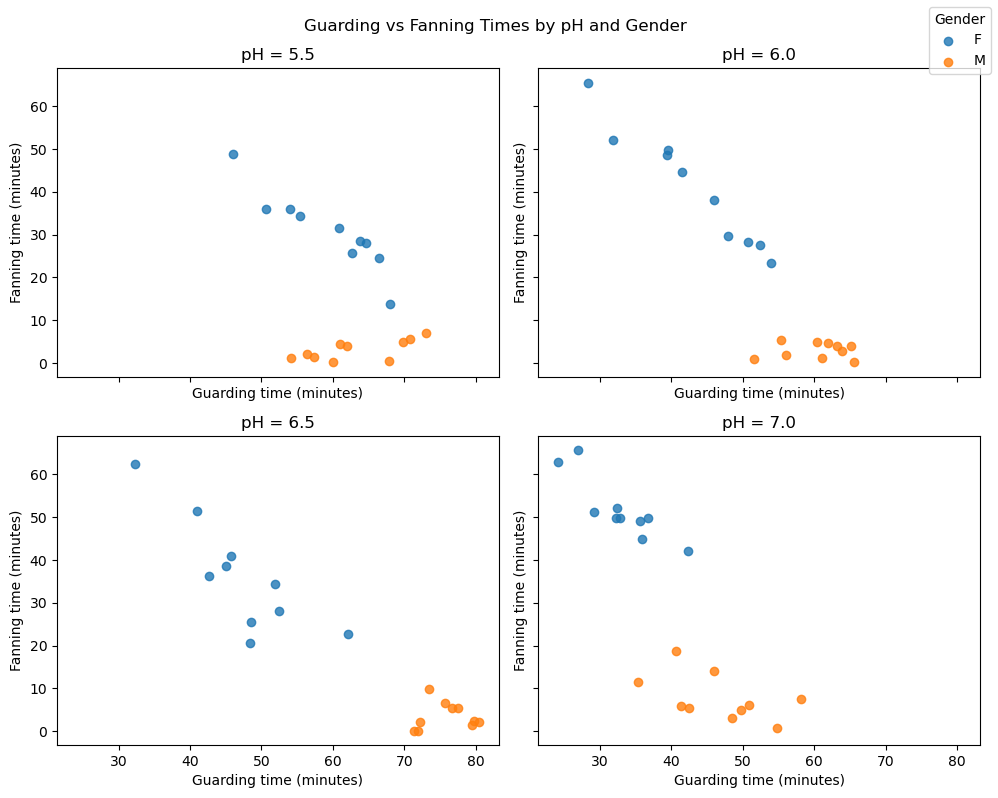

In [15]:
ph_levels = sorted(df["pH"].unique())
n_levels = len(ph_levels)

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.ravel()

for ax, pH_level in zip(axes, ph_levels):
    sub = df[df["pH"] == pH_level]
    for gender, sub_gender in sub.groupby("Gender"):
        ax.scatter(sub_gender["Guarding"],
                   sub_gender["Fanning"],
                   label=gender if pH_level == ph_levels[0] else None,
                   alpha=0.8)
    ax.set_title(f"pH = {pH_level}")
    ax.set_xlabel("Guarding time (minutes)")
    ax.set_ylabel("Fanning time (minutes)")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Gender", loc="upper right")

fig.suptitle("Guarding vs Fanning Times by pH and Gender", y=0.98)
plt.tight_layout()
plt.show()